# Investigating Fandango Movie Ratings
## Introduction part 2

Now that we scraped for further data about the movies present in the two data set, we can push our analysis further and look for any correlation among movie's budget and ratings.

We're deeply convinced that there is some kind of correlation between the way Fandango value a movie and the company from which that movie comes from

That's the reason why we scraped some economic data from wikipedia: to check if it is possible to establish that correlation.

First we'll need to clean and reformat the new columns we created.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import re
import ast
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fan_2015 = pd.read_csv('fandango_2015.csv', converters={'movie_data': ast.literal_eval})
fan_2016 = pd.read_csv('fandango_2016.csv', converters={'movie_data': ast.literal_eval})

In [2]:
fan_2015.movie_data.str[1].unique()

array(['$1.403 billion[4]', '$14.4 million[3]', '$13.1 million[4]',
       '$38.2 million[3]', '$106.2 million[7]', '$326.4 million[2]',
       '$216.7 million[5]', '$94 million[4]', '$45.7 million[2]',
       '$113 million[6]', '$71.6 million[3]', '$36.9 million[5]',
       '$44.8 million', '$3 million[2]', '¥3.85 billion($36 million)',
       '$405,917[1]', '$52.4 million[4]', '$11 million [1]',
       '$2 million[2]', '$625,727[2]', '$2.4 million[2]',
       '$4 million[7][8]', '$7 million[1]', '$2.3 million[4]',
       '$414.4 million[3]', '$297.3 million[2]', '$440.6 million[2]',
       '$287.5 million[4]', '$49.3 million[5]', '$65.7 million[3]',
       '$51.4 million[3]', '$43.7\xa0million[4]', '$33.2 million[3]',
       '$41.3 million[6]', '$114.2 million[5]', '$30.3 million[3]',
       '$5.1 million[2]', '$62.9 million[3]', '$17.1 million[4]',
       '$547.4 million[4]', '$1.516 billion[3]', '$474\xa0million[4]',
       '$102.1 million[4]', '$30.5 million[2]', '$54.1 million[5]

# Cleaning Data

We'll use now some regex patterns to start cleaning the values we have.
Especially for the distribution column we'll try to extract the first two words of each company.

In [3]:
# isolating strings using regex patterns

fan_2015['movie_budget'] = fan_2015['movie_budget'].str.extract("[$](\d+[.,]?[-]?[–]?\d+)")
fan_2015['box_off'] = fan_2015['box_off'].str.extract("[$](\d+[.,]?[-]?[–]?\d+)")
fan_2015['billion?'] = fan_2015.movie_data.str[1].str.contains('billion')
fan_2015['million?'] = fan_2015.movie_data.str[1].str.contains('million')
fan_2015['distribution'] = fan_2015['distribution'].str.extract("([A-z-0-9]+\s?[A-z-0-9]*)")

fan_2016['movie_budget'] = fan_2016['movie_budget'].str.extract("[$](\d+[.,]?[-]?[–]?\d+)")
fan_2016['box_office'] = fan_2016['box_office'].str.extract("[$](\d+[.,]?[-]?[–]?\d+)")
fan_2016['billion?'] = fan_2016.movie_data.str[1].str.contains('billion')
fan_2016['million?'] = fan_2016.movie_data.str[1].str.contains('million')
fan_2016['distribution'] = fan_2016['distribution'].str.extract("([A-z-0-9]+\s?[A-z-0-9]*)")

In [4]:
# checking results

fan_2015.head()

,Unnamed: 0,movie,year,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,movie_data,movie_budget,box_off,distribution,billion?,million?
0,0,Avengers: Age of Ultron,2015,5.0,4.5,14846,0.5,(\n$444–495.2 million (gross)[2][3]\n$365 mill...,444–495,1.403,Walt Disney,True,False
1,3,Do You Believe?,2015,5.0,4.5,1793,0.5,"($2.3 million[2], $14.4 million[3], Pure Flix ...",2.3,14.4,Pure Flix,False,True
2,4,Hot Tub Time Machine 2,2015,3.5,3.0,1021,0.5,"($14–18 million[4][5], $13.1 million[4], Param...",14–18,13.1,Paramount Pictures[1][2],False,True
3,5,The Water Diviner,2015,4.5,4.0,397,0.5,"($22.5 million[3], $38.2 million[3], \nEnterta...",22.5,38.2,Entertainment One,False,True
4,8,Shaun the Sheep Movie,2015,4.5,4.0,896,0.5,"($25 million[6], $106.2 million[7], StudioCanal)",25,106.2,StudioCanal,False,True


In [5]:
fan_2016.head()

,Unnamed: 0,Unnamed: 0.1,movie,year,fandango,movie_data,movie_budget,box_office,distribution,billion?,million?
0,0,0,10 Cloverfield Lane,2016,3.5,"($13–15 million[2][3][4], $110.2 million[5], P...",13–15,110.2,Paramount Pictures,False,True
1,1,1,13 Hours,2016,4.5,"($50 million[2], $69.4 million[2], Paramount P...",50,69.4,Paramount Pictures,False,True
2,2,2,A Cure for Wellness,2016,3.0,"($40 million[2], $26.6 million[2], 20th Centur...",40,26.6,20th Century,False,True
3,9,10,Anthropoid,2016,4.0,"($9 million[4], $5.3 million[1], Falcon (Czech...",NaN,5.3,Falcon,False,True
4,10,11,Approaching the Unknown,2016,3.5,"($1.3 million[4], $10,232[5][6], Vertical Ente...",1.3,"10,232",Vertical Entertainment,False,False


<AxesSubplot:>

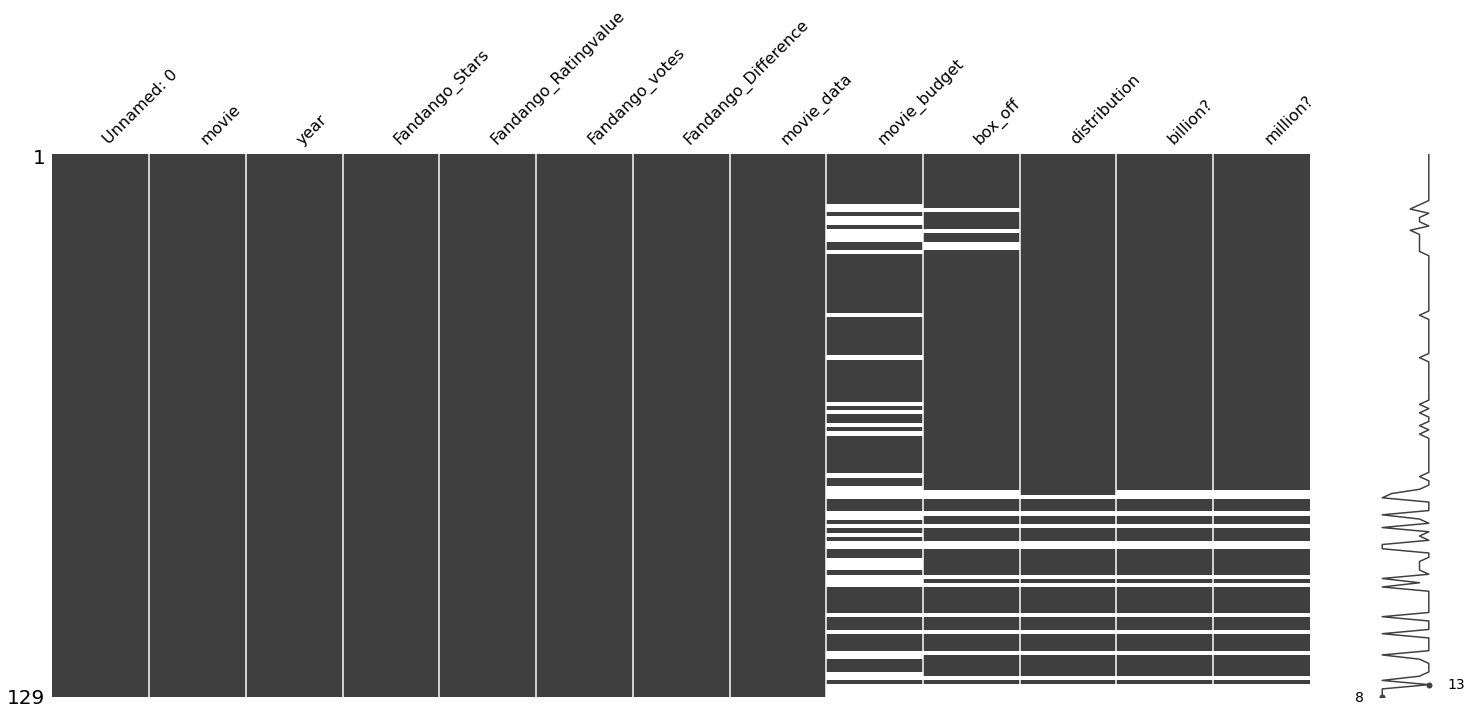

In [6]:
msno.matrix(fan_2015)

<AxesSubplot:>

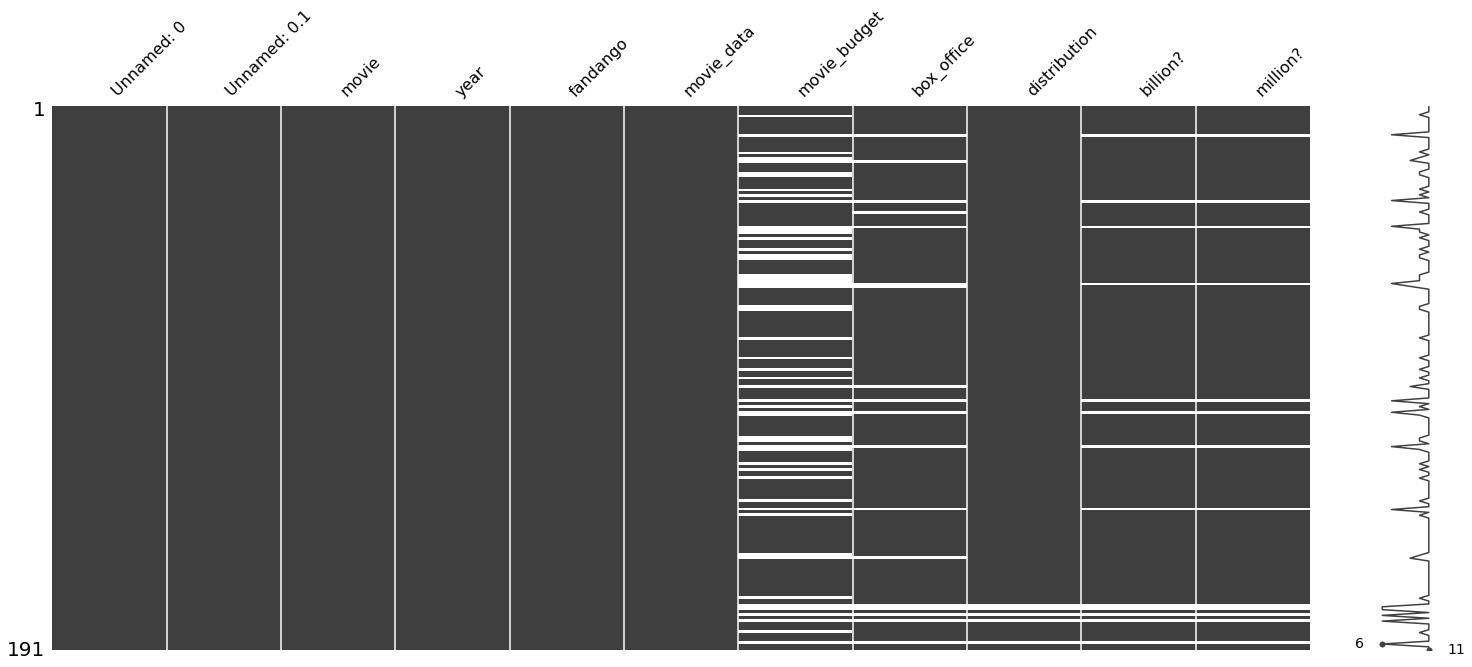

In [7]:
msno.matrix(fan_2016)

The regex we created for extracting the house of distribution worked pretty fine, but still there are some missing values.
We're going replace them manually.
Web scraping can show these kind of situations, especially if we decide to use regex strings after.

But first we'll have to neat the movie_budget column. This column, in fact, contains some values which are of range type.
We'll create a function that return the mean value between the lower and higher.

## Tidying up budget column

In [8]:
# checking unique values

fan_2015.movie_budget.unique()

array(['444–495', '2.3', '14–18', '22.5', '25', '48', '68', '30', '17',
       '11', '50–61', '15', nan, '10.5', '14', '13', '1.35', '81-94',
       '110', '155–158', '29–31', '27–39', '35', '8.5', '12', '95', '28',
       '20', '5–10', '59', '190', '49', '26', '10', '154.6', '60–74',
       '1.6', '200,000', '40-44', '50.1', '176–200', '100,000', '40',
       '9.6', '1.3', '6.7', '14.8', '23', '150', '74', '30–40', '34',
       '3.3', '175', '130–169', '88–129', '37–52', '180–190', '120–155',
       '50', '28–50', '31', '70', '1.4', '65', '70–100', '7–10', '135',
       '3.4'], dtype=object)

In [9]:
fan_2016.movie_budget.unique()

array(['13–15', '50', '40', nan, '1.3', '47', '20', '26', '250–300',
       '100', '16', '15', '35', '8.5', '250', '36–40', '21.5', '11.5',
       '9.9', '9.1', '9.8', '24', '175–200', '25–30', '22', '12', '25',
       '38', '2.5', '105', '165', '75', '96', '60', '145', '30', '4.9',
       '18', '33–35', '150–175', '27.4', '22.5', '90–120', '45', '9-12',
       '10.5', '220', '19', '10', '185', '135', '38–54', '44', '73', '29',
       '70–80', '7–25', '45–50', '115', '28–47', '180', '17–25', '7.9',
       '52', '178', '50–55', '150', '43', '170', '85–113', '125', '31.5',
       '58', '156', '165–236', '23', '17', '140', '120', '2.7', '90',
       '5–10', '14', '11', '110', '1.5', '110–150', '28', '30–60', '70',
       '175', '175–177', '160'], dtype=object)

In [10]:
# creating function

def budget_neat(budget):
    if budget is not np.NaN:
        if re.search(',', budget):
            splitted = budget.split(',')
            return float(splitted[0]) / 1000
        #need this if statement cause some '-' are differently encoded
        elif re.search('–', budget):
            splitted = budget.split('–')
            #converting values into float
            floated = [float(i) for i in splitted]
            #calculating the mean
            mean_value = sum(floated) / len(floated)
            return mean_value
        else:
            splitted = budget.split('-')
            floated = [float(i) for i in splitted]
            #calculating the mean
            mean_value = sum(floated) / len(floated)
            return mean_value
    else:
        return np.NaN

In [11]:
# applying function

fan_2015['movie_budget'] = fan_2015['movie_budget'].apply(lambda budget: budget_neat(budget))
fan_2016['movie_budget'] = fan_2016['movie_budget'].apply(lambda budget: budget_neat(budget))

In [12]:
# checking results

fan_2015.movie_budget

0      469.5
1        2.3
2       16.0
3       22.5
4       25.0
       ...  
124      NaN
125      3.4
126      NaN
127      NaN
128      NaN
Name: movie_budget, Length: 129, dtype: float64

In [13]:
fan_2016.movie_budget

0       14.0
1       50.0
2       40.0
3        NaN
4        1.3
       ...  
186    176.0
187     20.0
188      NaN
189    125.0
190    160.0
Name: movie_budget, Length: 191, dtype: float64

Job done for the **movie_budget** column.
Now we'll have to do the same for the **box_office** one.

In [14]:
fan_2015.box_off.unique()

array(['1.403', '14.4', '13.1', '38.2', '106.2', '326.4', '216.7', '94',
       '45.7', '113', '71.6', '36.9', '44.8', nan, '36', '405,917',
       '52.4', '11', '625,727', '2.4', '2.3', '414.4', '297.3', '440.6',
       '287.5', '49.3', '65.7', '51.4', '43.7', '33.2', '41.3', '114.2',
       '30.3', '5.1', '62.9', '17.1', '547.4', '1.516', '474', '102.1',
       '30.5', '54.1', '375.6', '325.2', '18', '7.3', '1.1', '111.8',
       '158.8', '183.9', '43', '86', '24.2', '82.3', '13.5', '10.08',
       '51.2', '3.8', '23.3', '21.1', '4.7', '2.1', '1.2', '122.5',
       '79.8', '1.670', '1.159', '44', '107.6', '63', '38.4', '10.8',
       '3.6', '858.8', '29.4', '3.2', '519.3', '27.4', '28.6', '1.6',
       '244.9', '140.8', '694,600', '26.3', '209', '167.9', '21.7',
       '47.3', '5.3', '13', '743,541', '201.6', '107.2', '95.4', '85.5',
       '19.7', '17.7', '1,663', '235.7', '282.8', '569.7', '13.6', '2.9',
       '660,561', '924,793', '386', '61.6', '145,427', '23.7'],
      dtype=ob

In [15]:
# renaming column for 2016 df

fan_2016.rename(columns={'box_office': 'box_off'}, inplace=True)

In [16]:
fan_2016.box_off.unique()

array(['110.2', '69.4', '26.6', '5.3', '10,232', '203.4', '183.9', '24.1',
       '55', '873.6', nan, '94.1', '7.2', '6.9', '212', '98.5', '39,065',
       '1.153', '22.8', '217', '88.5', '6.8', '4,052', '31', '105.2',
       '157.8', '12.7', '1.8', '260,000', '64.4', '22.2', '1.029',
       '295.2', '180.5', '63.6', '37.9', '236.2', '112.3', '23.2', '15.8',
       '2.1', '408.6', '61,797', '389.7', '220', '162.1', '36.6', '3.8',
       '22.5', '6.55', '77.5', '521.2', '448.9', '148.9', '205.9', '21.4',
       '12.9', '79', '29.7', '125.8', '6.7', '77.1', '645', '93.3', '8.8',
       '685,780', '90.6', '108.8', '57.8', '32.4', '30.5', '334.9',
       '114.5', '81.7', '567,064', '25.1', '312.2', '124.6', '46.4',
       '1.056', '140.7', '13.1', '13.6', '37.3', '343.5', '240.8', '5.8',
       '245.6', '109.9', '509,725', '155.2', '352.3', '78.8', '64.2',
       '28', '23.4', '321.8', '10.9', '5.7', '19.4', '52.1', '37.6',
       '173.2', '165', '20.7', '356.7', '9.75', '3.4', '62.8', '10

We can see that the **box_office** column has data formatted in very different ways.
* Some represent billion of dollars
* Some million of dollars
* Some hundread of dollars

We'll need to write another function that catches all these exceptions and return float values.
We know that in the **movie_data** column we can find either we're talking of billions or million.

In [17]:
def box_off_cleaning(df):
    
    box_off = df['box_off']
    bill_bool = df['billion?']
    mill_bool = df['million?']
    
    if box_off is not np.NaN:
        if bill_bool == True:
            return float(box_off.replace('.',''))
        elif bill_bool == False and mill_bool == True:
            return float(box_off)
        else:
            return float(box_off.replace(',','.')) / 1000
    else:
        return np.NaN    

In [18]:
fan_2015['box_off'] = fan_2015.apply(box_off_cleaning, axis=1)
fan_2016['box_off'] = fan_2016.apply(box_off_cleaning, axis=1)

In [19]:
# checking

fan_2015.box_off.describe()

count     110.000000
mean      151.132566
std       294.053293
min         0.001663
25%        13.200000
50%        43.850000
75%       120.425000
max      1670.000000
Name: box_off, dtype: float64

In [20]:
fan_2016.box_off.describe()

count     173.000000
mean      155.132261
std       234.984714
min         0.004052
25%        16.400000
50%        62.800000
75%       183.400000
max      1153.000000
Name: box_off, dtype: float64

Ok!
Now that we cleaned movie budget's and box office's columns, we want to recheck the unique values for the distribution and see if we need to do some further cleaning for that column.

# Distribution column
## Clean and reshape

In [21]:
# checking unique values

fan_2015.distribution.unique()

array(['Walt Disney', 'Pure Flix', 'Paramount Pictures[1][2]',
       'Entertainment One', 'StudioCanal', 'EuropaCorp Distribution',
       'Universal Pictures', 'The Weinstein', 'Gramercy Pictures[2]',
       'Warner Bros', 'A24 ', 'Sony Pictures', 'A24', 'Toho',
       'RADiUS-TWC', 'Universal Pictures[1]', 'Open Road', 'Focus World',
       'Alchemy', 'Dreamlab Films', '20th Century', 'Lionsgate\n',
       'Paramount Pictures', 'Lionsgate', 'Lionsgate\nCBS',
       'Mars Distribution', 'Focus Features', 'Gramercy Pictures[1]',
       'Village Roadshow', 'Madman Entertainment', 'The OrchardUniversal',
       'Fox Searchlight', 'Lionsgate\nPantelion', 'Path', 'A24[1]',
       'Les Films', 'Magnolia Pictures', 'Columbia Pictures[4]',
       'Relativity Media', 'Bleecker Street', 'Entertainment One[1][2]',
       nan, 'LionsgateRoadside Attractions', 'Relativity MediaIM',
       'Summit EntertainmentLionsgate', 'IFC Films',
       'Universal PicturesOpen', 'Lionsgate Films', 'StudioCana

In [22]:
fan_2016.distribution.unique()

array(['Paramount Pictures', '20th Century', 'Falcon ',
       'Vertical Entertainment', 'STX Entertainment', 'Broad Green',
       'Warner Bros', 'National Geographic', 'Open Road', 'SND Films',
       'Universal Pictures', 'Next Entertainment', 'IFC Midnight',
       'Walt Disney', 'Bleecker Street', 'Saban Films', 'Netflix\nThe',
       'Lionsgate', 'Sony Pictures', 'SBS DistributionSony',
       'Amazon Studios', 'Lionsgate Premiere', 'Columbia Pictures',
       'Lionsgate ', 'The Weinstein', 'Lionsgate\nCBS', 'Piki Films',
       'Netflix', 'BFI ', 'RLJ Entertainment', 'Focus World',
       'Fox Searchlight', 'Aniplex', 'Focus Features', 'Lionsgate[1]',
       'Focus Features[1]', 'Sophie Dulac', 'Focus Features[2]',
       'Lionsgate Premiere[1]', 'Relativity Media', 'Summit Premiere',
       'Cinelou Releasing', 'EuropaCorp', 'Paramount Pictures[1]',
       'Entertainment One', 'EuropaCorp ', 'A24', 'BH Tilt', 'Rogue',
       'Gramercy Pictures', 'United Artists', 'Mutual Film',

We'll cancel this "[num]" and reshape some rows so to have the same name for everyone.

In [23]:
# reshaping movies from 2015
# masking the value so to avoid setwithcopy Warning when indexing rows

lions_mask = fan_2015.distribution.str.startswith('Lionsgate', na=False)
a_24_mask = fan_2015.distribution.str.startswith('A24', na=False)
up_mask = fan_2015.distribution.str.startswith('Universal', na=False)
par_mask = fan_2015.distribution.str.startswith('Paramount', na=False)
gram_mask = fan_2015.distribution.str.startswith('Gram', na=False)
ent_mask = fan_2015.distribution.str.startswith('Ent', na=False)
studio_mask = fan_2015.distribution.str.startswith('Studio', na=False)
radius_mask = fan_2015.distribution.str.startswith('Rad', na=False)

fan_2015.loc[lions_mask, 'distribution'] = 'Lionsgate'
fan_2015.loc[a_24_mask, 'distribution'] = 'A24'
fan_2015.loc[up_mask, 'distribution'] = 'Universal Pictures'
fan_2015.loc[par_mask, 'distribution'] = 'Paramount Pictures'
fan_2015.loc[gram_mask, 'distribution'] = 'Gramercy Pictures'
fan_2015.loc[ent_mask, 'distribution'] = 'Entertainment One'
fan_2015.loc[studio_mask, 'distribution'] = 'Studio Canal'
fan_2015.loc[radius_mask, 'distribution'] = 'Radius-TWC'

In [24]:
# reshaping movies from 2016

lions_mask = fan_2016.distribution.str.startswith('Lionsgate', na=False)
net_mask = fan_2016.distribution.str.startswith('Net', na=False)
par_mask = fan_2016.distribution.str.startswith('Paramount', na=False)
studio_mask = fan_2016.distribution.str.startswith('Studio', na=False)

fan_2016.loc[lions_mask, 'distribution'] = 'Lionsgate'
fan_2016.loc[net_mask, 'distribution'] = 'Netflix'
fan_2016.loc[par_mask, 'distribution'] = 'Paramount Pictures'
fan_2016.loc[studio_mask, 'distribution'] = 'Studio Canal'

In [25]:
fan_2015.distribution.unique()

array(['Walt Disney', 'Pure Flix', 'Paramount Pictures',
       'Entertainment One', 'Studio Canal', 'EuropaCorp Distribution',
       'Universal Pictures', 'The Weinstein', 'Gramercy Pictures',
       'Warner Bros', 'A24', 'Sony Pictures', 'Toho', 'RADiUS-TWC',
       'Open Road', 'Focus World', 'Alchemy', 'Dreamlab Films',
       '20th Century', 'Lionsgate', 'Mars Distribution', 'Focus Features',
       'Village Roadshow', 'Madman Entertainment', 'The OrchardUniversal',
       'Fox Searchlight', 'Path', 'Les Films', 'Magnolia Pictures',
       'Columbia Pictures[4]', 'Relativity Media', 'Bleecker Street', nan,
       'Relativity MediaIM', 'Summit EntertainmentLionsgate', 'IFC Films',
       'Cinelou Releasing', 'Radius-TWC', 'Altitude Film'], dtype=object)

In [26]:
fan_2016.distribution.unique()

array(['Paramount Pictures', '20th Century', 'Falcon ',
       'Vertical Entertainment', 'STX Entertainment', 'Broad Green',
       'Warner Bros', 'National Geographic', 'Open Road', 'SND Films',
       'Universal Pictures', 'Next Entertainment', 'IFC Midnight',
       'Walt Disney', 'Bleecker Street', 'Saban Films', 'Netflix',
       'Lionsgate', 'Sony Pictures', 'SBS DistributionSony',
       'Amazon Studios', 'Columbia Pictures', 'The Weinstein',
       'Piki Films', 'BFI ', 'RLJ Entertainment', 'Focus World',
       'Fox Searchlight', 'Aniplex', 'Focus Features',
       'Focus Features[1]', 'Sophie Dulac', 'Focus Features[2]',
       'Relativity Media', 'Summit Premiere', 'Cinelou Releasing',
       'EuropaCorp', 'Entertainment One', 'EuropaCorp ', 'A24', 'BH Tilt',
       'Rogue', 'Gramercy Pictures', 'United Artists', 'Mutual Film',
       'XYZ Films', 'Icon Film', 'Cinedigm', 'Summit Entertainment',
       'TWC-Dimension[1]', 'The Cannon', 'Transmission Films',
       'Studio Ca

We now reshaped the distribution columns for the two dataset.
What we now have to do is checking for missing values. Some of the data could just be missing from wikipedia pages, while some others could not have been catched by our function **scrape_wiki**. Things like these can happen especially when you scrape data from wikipedia pages; in fact it can happen sometimes that it's not possible to establish a univocal way to catch each and every item you're interested in.

We'll filter for the movies in which **movie_budget**, **box_office** and **distribution** are missing.
We'll cover just the blockbuster movies (movies with highest number of votes)

In [27]:
fan_2015.loc[(fan_2015.movie_budget.isnull()) & (fan_2015.box_off.isnull()) & (fan_2015.distribution.isnull())]\
            .sort_values('Fandango_votes', ascending=False)

,Unnamed: 0,movie,year,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,movie_data,movie_budget,box_off,distribution,billion?,million?
81,1,Cinderella,2015,5.0,4.5,12640,0.5,"(None, None, None)",NaN,NaN,NaN,None,None
124,128,Mission: Impossible â€“ Rogue Nation,2015,4.5,4.4,8357,0.1,"(None, None, None)",NaN,NaN,NaN,None,None
88,22,The Man From U.N.C.L.E.,2015,4.5,4.1,2686,0.4,"(None, None, None)",NaN,NaN,NaN,None,None
100,66,The Gift,2015,4.0,3.7,2680,0.3,"(None, None, None)",NaN,NaN,NaN,None,None
126,136,The Woman In Black 2 Angel of Death,2015,3.0,3.0,1333,0.0,"(None, None, None)",NaN,NaN,NaN,None,None
85,10,Far From The Madding Crowd,2015,4.5,4.0,804,0.5,"(None, None, None)",NaN,NaN,NaN,None,None
109,86,Me and Earl and The Dying Girl,2015,4.5,4.3,624,0.2,"(None, None, None)",NaN,NaN,NaN,None,None
92,40,I'll See You In My Dreams,2015,4.0,3.6,281,0.4,"(None, None, None)",NaN,NaN,NaN,None,None
113,95,The Salt of the Earth,2015,4.5,4.3,83,0.2,"(None, None, None)",NaN,NaN,NaN,None,None
93,41,Timbuktu,2015,4.0,3.6,74,0.4,"(None, None, None)",NaN,NaN,NaN,None,None


In [28]:
# filling values for Cinderella
fan_2015.loc[81, ('movie_budget', 'box_off', 'distribution')] = (89.60, 542.4, 'Walt Disney')
# for Mission Impossible
fan_2015.loc[124, ('movie_budget', 'box_off', 'distribution')] = (150, 682.7, 'Paramount Pictures')
# for The Man from...
fan_2015.loc[88, ('movie_budget', 'box_off', 'distribution')] = (79.5, 107, 'Warner Bros')
# for The Gift
fan_2015.loc[100, ('movie_budget', 'box_off', 'distribution')] = (5, 59, 'STX Entertainment')

Fixed the columns for the most important movies from 2015, we'll now dedicate to the movies from 2016.

In [29]:
fan_2016.loc[(fan_2016.movie_budget.isnull()) & (fan_2016.box_off.isnull()) & (fan_2016.distribution.isnull())]

,Unnamed: 0,Unnamed: 0.1,movie,year,fandango,movie_data,movie_budget,box_off,distribution,billion?,million?
175,119,131,Pele: Birth of a Legened,2016,4.5,"(None, None, None)",NaN,NaN,NaN,None,None
176,120,132,Pete's Dragon,2016,4.5,"(None, None, None)",NaN,NaN,NaN,None,None
178,130,143,Sing,2016,4.5,"(None, None, None)",NaN,NaN,NaN,None,None
180,134,148,Split,2016,4.0,"(None, None, None)",NaN,NaN,NaN,None,None
188,176,197,The Take (Bastille Day),2016,4.0,"(None, None, None)",NaN,NaN,NaN,None,None


Unfortunately we don't have a number of votes column in this dataset but luckily it's just 5 movies we have to deal with.
No big problems...

In [30]:
fan_2016.loc[175, ('movie_budget', 'box_off', 'distribution')] = (np.NaN, 2.3, 'IFC Films')
fan_2016.loc[176, ('movie_budget', 'box_off', 'distribution')] = (65, 143.7, 'Walt Disney')
fan_2016.loc[178, ('movie_budget', 'box_off', 'distribution')] = (75, 634.2, 'Universal Pictures')
fan_2016.loc[180, ('movie_budget', 'box_off', 'distribution')] = (9, 278.5, 'Universal Pictures')
fan_2016.loc[188, ('movie_budget', 'box_off', 'distribution')] = (4, 14.9, 'Studio Canal')

# Dropping columns

We reshaped the two dataframes, checked for missing values; so now we're ready to drop some of the columns that are redundant for our analysis.

In [31]:
fan_2015.columns

Index(['Unnamed: 0', 'movie', 'year', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'Fandango_votes', 'Fandango_Difference', 'movie_data', 'movie_budget',
       'box_off', 'distribution', 'billion?', 'million?'],
      dtype='object')

In [32]:
fan_2016.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'movie', 'year', 'fandango', 'movie_data',
       'movie_budget', 'box_off', 'distribution', 'billion?', 'million?'],
      dtype='object')

By checking the column names we can see that **'Unnamed**, **movie_data**, **billion?** and **million?** are useless at this point of the project.
We'll just drop them.

In [33]:
fan_2015.drop(columns=['Unnamed: 0', 'movie_data', 'billion?', 'million?'], inplace=True)
fan_2016.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'movie_data', 'billion?', 'million?'], inplace=True)

In [34]:
# checking results

fan_2015.head()

,movie,year,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,movie_budget,box_off,distribution
0,Avengers: Age of Ultron,2015,5.0,4.5,14846,0.5,469.5,1403.0,Walt Disney
1,Do You Believe?,2015,5.0,4.5,1793,0.5,2.3,14.4,Pure Flix
2,Hot Tub Time Machine 2,2015,3.5,3.0,1021,0.5,16.0,13.1,Paramount Pictures
3,The Water Diviner,2015,4.5,4.0,397,0.5,22.5,38.2,Entertainment One
4,Shaun the Sheep Movie,2015,4.5,4.0,896,0.5,25.0,106.2,Studio Canal


In [35]:
fan_2016.head()

,movie,year,fandango,movie_budget,box_off,distribution
0,10 Cloverfield Lane,2016,3.5,14.0,110.200000,Paramount Pictures
1,13 Hours,2016,4.5,50.0,69.400000,Paramount Pictures
2,A Cure for Wellness,2016,3.0,40.0,26.600000,20th Century
3,Anthropoid,2016,4.0,NaN,5.300000,Falcon
4,Approaching the Unknown,2016,3.5,1.3,0.010232,Vertical Entertainment


# Data Analysis
## Budget analysis

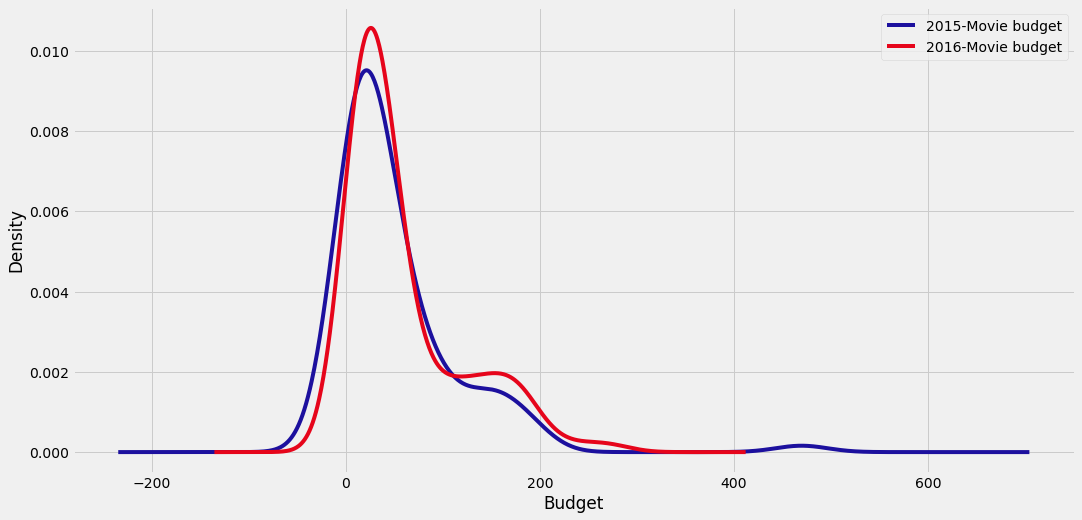

In [36]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
fan_2015.movie_budget.plot.kde(color='#1c109e', label='2015-Movie budget', legend=True)
fan_2016.movie_budget.plot.kde(color='#e6051b', label='2016-Movie budget', legend=True)
plt.xlabel('Budget')
plt.show()

The kernel distribution graph shows that the movies' budget didn't change that much between the two years having almost the same distribution of the values.

In [37]:
top_2015 = fan_2015.groupby('distribution')['movie_budget'].sum().sort_values(ascending=False)[:5].to_frame()
top_2016 = fan_2016.groupby('distribution')['movie_budget'].sum().sort_values(ascending=False)[:5].to_frame()

In [38]:
print("Top companies per total budget (2015):")
top_2015

Top companies per total budget (2015):


,movie_budget
distribution,
Walt Disney,1187.7
Universal Pictures,811.0
Warner Bros,718.0
20th Century,576.0
Paramount Pictures,401.5


In [39]:
print("Top companies per total budget (2016):")
top_2016

Top companies per total budget (2016):


,movie_budget
distribution,
Walt Disney,1816.5
Warner Bros,1425.4
20th Century,1254.0
Paramount Pictures,892.5
Universal Pictures,844.0


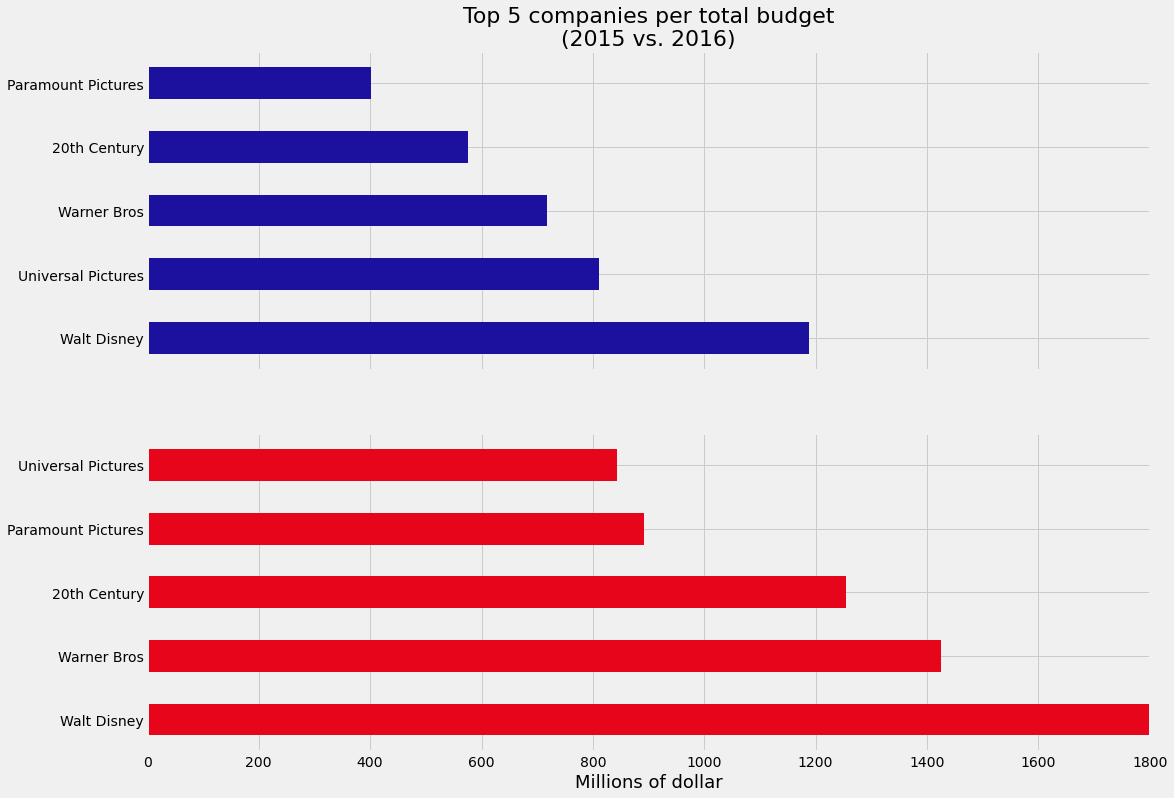

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(16,12))
top_2015.plot(kind='barh', ax=ax1, legend=False, color='#1c109e')
ax1.set_xlim((0, 1800))
ax1.set_ylabel('Companies').set_visible(False)
ax1.set_title('Top 5 companies per total budget\n(2015 vs. 2016)', size=22)
top_2016.plot(kind='barh', ax=ax2, legend=False, color='#e6051b')
ax2.set_xlim((0, 1800))
ax2.set_ylabel('Companies').set_visible(False)
plt.xlabel('Millions of dollar', size=18)
plt.show()

Both for 2015 and 2016 the companies with the highest movie budget are the same.

* Walt Disney - (1187 - 1816.5) mln 
* Warner Bros - (718 - 1425.5) mln
* 20th Century Fox - (576 - 1254) mln
* Paramount Pictures - (401.5 - 892.5) mln
* Universal Pictures - (811 - 844) mln

## Box Office analysis

In [41]:
bo_2015 = fan_2015.groupby('distribution')['box_off'].sum().sort_values(ascending=False)[:5].to_frame()
bo_2016 = fan_2016.groupby('distribution')['box_off'].sum().sort_values(ascending=False)[:5].to_frame()

In [42]:
print("Top companies per box office collection (2015):")
bo_2015

Top companies per box office collection (2015):


,box_off
distribution,
Universal Pictures,6028.2
Walt Disney,3660.1
Warner Bros,2071.9
20th Century,1544.6
Paramount Pictures,1494.8


In [43]:
print("Top companies per box office collection (2016):")
bo_2016

Top companies per box office collection (2016):


,box_off
distribution,
Walt Disney,7267.80
Warner Bros,4747.08
20th Century,4129.00
Universal Pictures,3917.90
Sony Pictures,2055.80


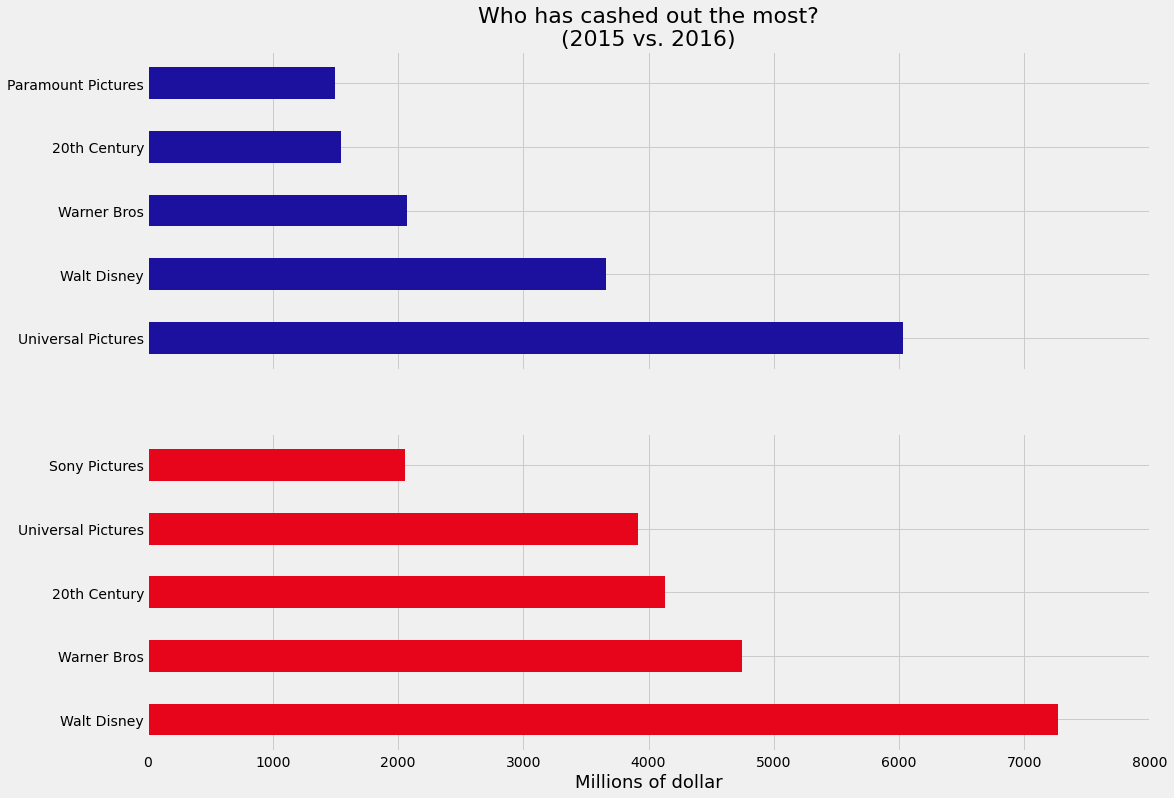

In [44]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(16,12))
bo_2015.plot(kind='barh', ax=ax1, legend=False, color='#1c109e')
ax1.set_xlim((0, 8000))
ax1.set_ylabel('Companies').set_visible(False)
ax1.set_title('Who has cashed out the most?\n(2015 vs. 2016)', size=22)
bo_2016.plot(kind='barh', ax=ax2, legend=False, color='#e6051b')
ax2.set_xlim((0, 8000))
ax2.set_ylabel('Companies').set_visible(False)
plt.xlabel('Millions of dollar', size=18)
plt.show()

As we could imagine, the companies that had highest budgets for the production of big blockbuster movies are the same with the highest box office collection.
We'll now extract some statistical samples by stratifying for company and see the distribution of the ratings.

## Rating analysis
### 2015

In [45]:
walt_disney = fan_2015[fan_2015.distribution == 'Walt Disney']
un_pict = fan_2015[fan_2015.distribution == 'Universal Pictures']
warner = fan_2015[fan_2015.distribution == 'Warner Bros']
fox = fan_2015[fan_2015.distribution == '20th Century']
paramount = fan_2015[fan_2015.distribution == 'Paramount Pictures']

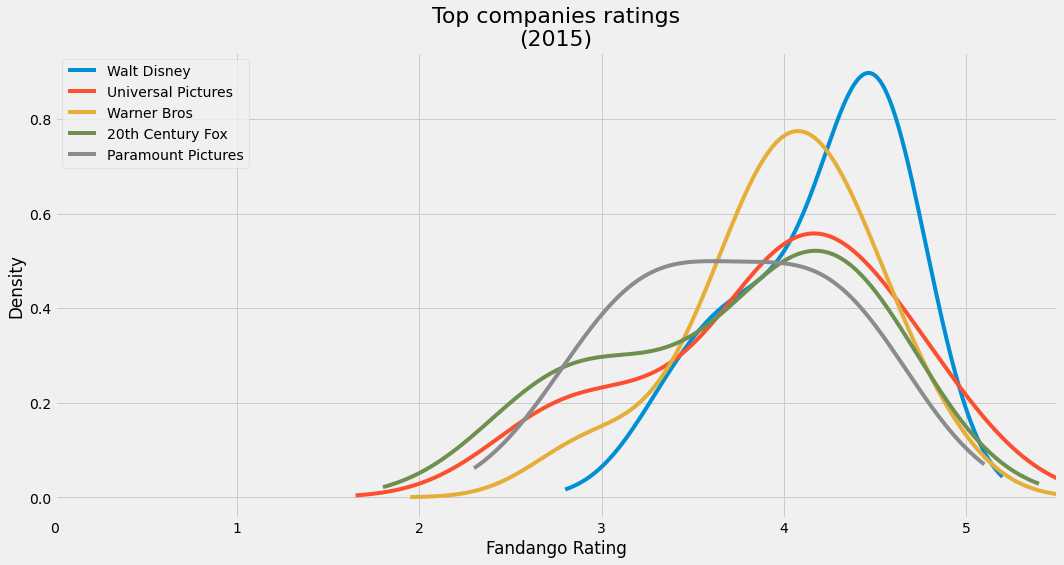

In [46]:
plt.figure(figsize=(16,8))
walt_disney.Fandango_Ratingvalue.plot.kde(label='Walt Disney', legend=True)
un_pict.Fandango_Ratingvalue.plot.kde(label='Universal Pictures', legend=True)
warner.Fandango_Ratingvalue.plot.kde(label='Warner Bros', legend=True)
fox.Fandango_Ratingvalue.plot.kde(label='20th Century Fox', legend=True)
paramount.Fandango_Ratingvalue.plot.kde(label='Paramount Pictures', legend=True)
plt.xlim((0,5.5))
plt.xlabel('Fandango Rating')
plt.title('Top companies ratings\n(2015)', size=22)
plt.show()

For the top 5 companies in 2015, the fandango ratings are mostly concentrated among the highest values. This could mean that **Fandango** rating sistem was biased in favour of those companies with an higher economic power towards the others.
We'll now check how each curve distribution behave respect to the other companies values.

In [47]:
# masking for other companies

other_companies = fan_2015.loc[(fan_2015.distribution != 'Walt Disney')\
                              &(fan_2015.distribution != 'Universal Pictures')\
                              &(fan_2015.distribution != 'Warner Bros')\
                              &(fan_2015.distribution != '20th Century')\
                              &(fan_2015.distribution != 'Paramount Pictures')]

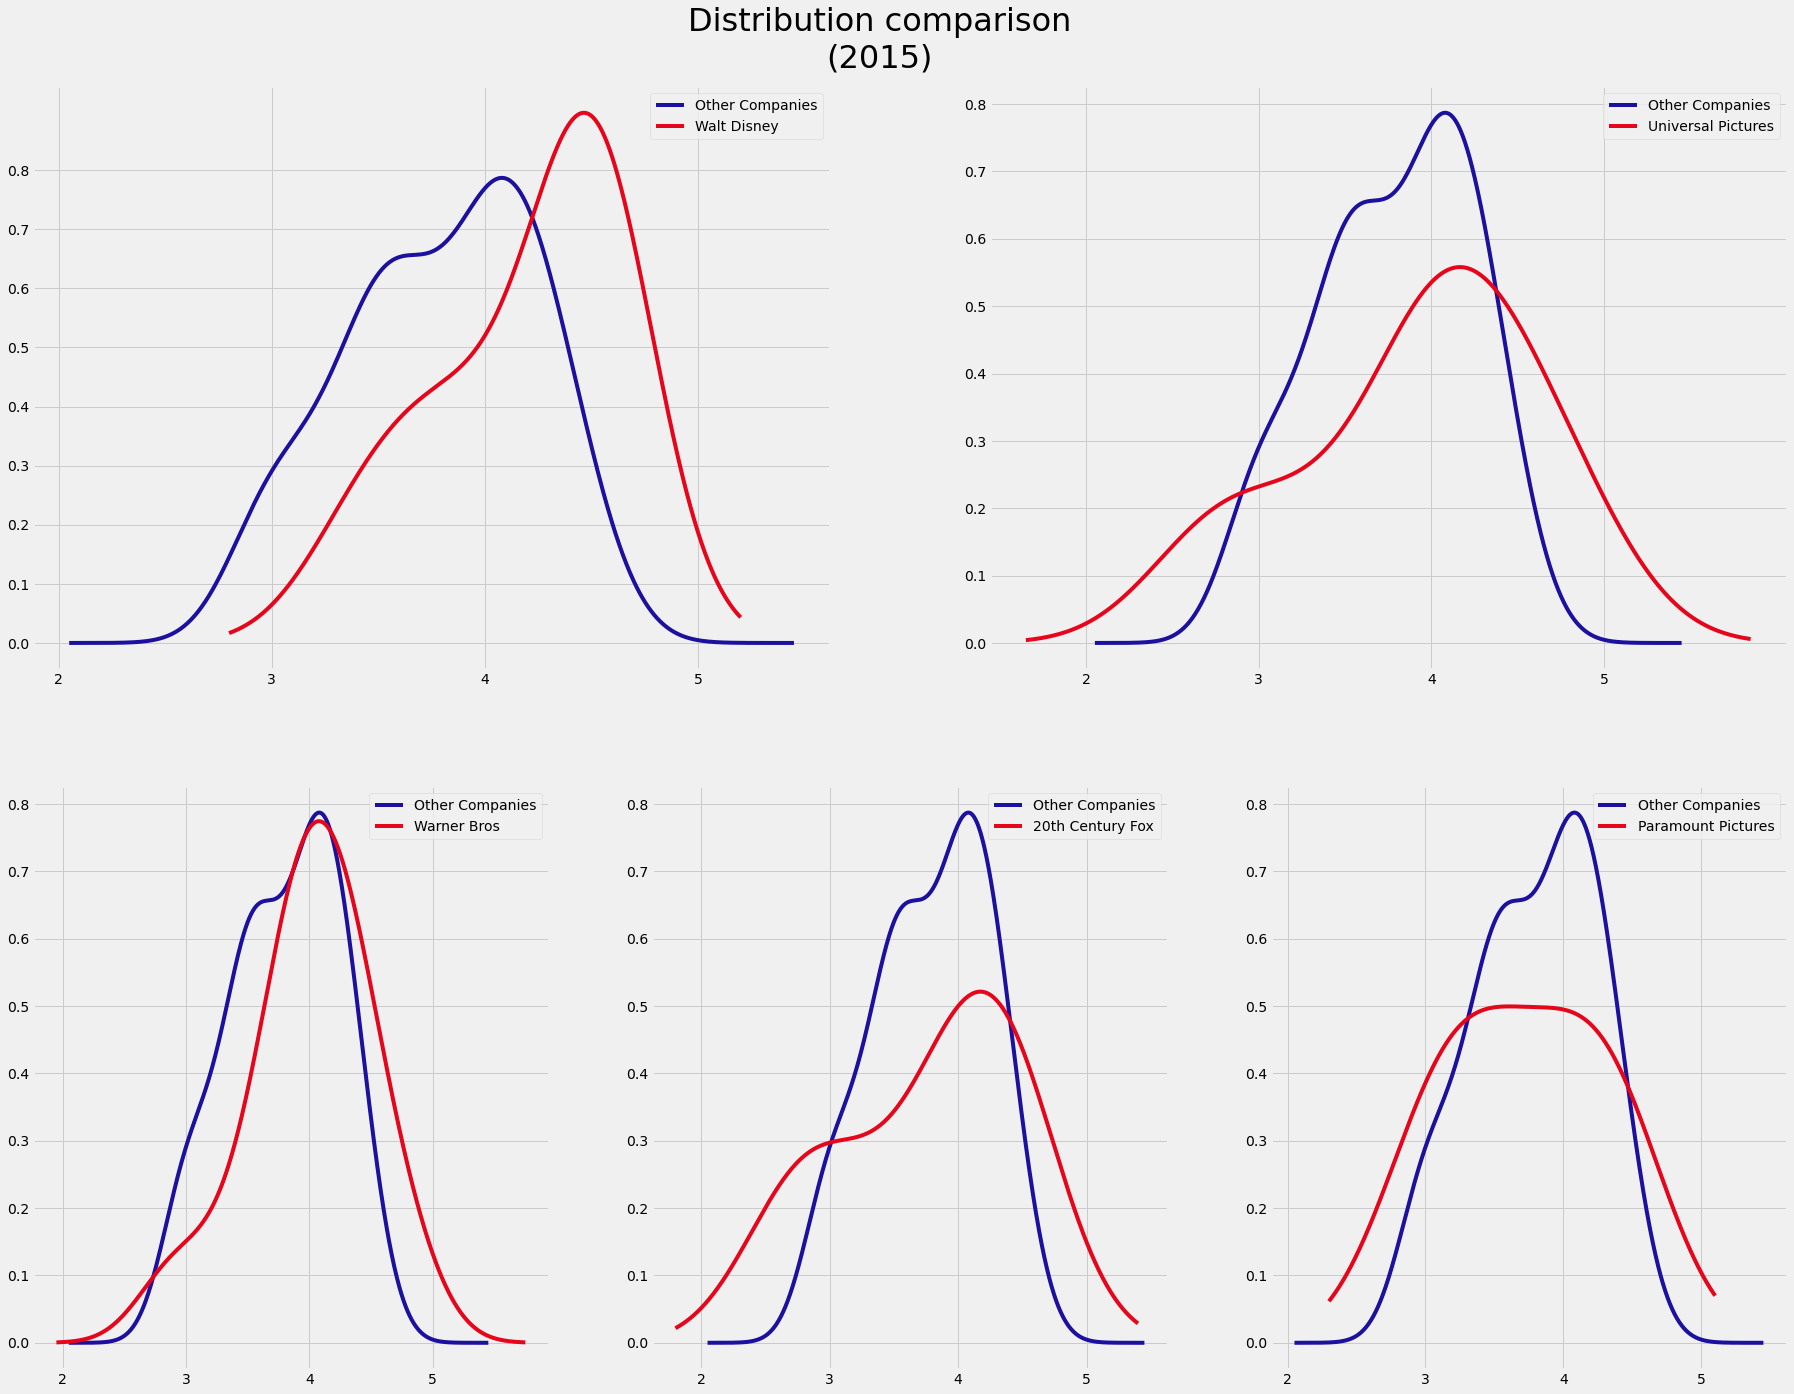

In [48]:
fig = plt.figure(figsize=(28,22))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,3,4)
ax4 = plt.subplot(2,3,5)
ax5 = plt.subplot(2,3,6)

axes = [ax1, ax2, ax3, ax4, ax5]

for ax in axes:
    ax.set_xticks([0,1,2,3,4,5])
    ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
    ax.set_ylabel('foo').set_visible(False)

# Walt Disney
other_companies.Fandango_Ratingvalue.plot.kde(ax=ax1, label='Other Companies', legend=True, color='#1c109e')
walt_disney.Fandango_Ratingvalue.plot.kde(ax=ax1, label='Walt Disney', legend=True, color='#e6051b')
# Universal Pictures
other_companies.Fandango_Ratingvalue.plot.kde(ax=ax2, label='Other Companies', legend=True, color='#1c109e')
un_pict.Fandango_Ratingvalue.plot.kde(ax=ax2, label='Universal Pictures', legend=True, color='#e6051b')
# Warner Bros
other_companies.Fandango_Ratingvalue.plot.kde(ax=ax3, label='Other Companies', legend=True, color='#1c109e')
warner.Fandango_Ratingvalue.plot.kde(ax=ax3, label='Warner Bros', legend=True, color='#e6051b')
# Fox
other_companies.Fandango_Ratingvalue.plot.kde(ax=ax4, label='Other Companies', legend=True, color='#1c109e')
fox.Fandango_Ratingvalue.plot.kde(ax=ax4, label='20th Century Fox', legend=True, color='#e6051b')
# Paramount
other_companies.Fandango_Ratingvalue.plot.kde(ax=ax5, label='Other Companies', legend=True, color='#1c109e')
paramount.Fandango_Ratingvalue.plot.kde(ax=ax5, label='Paramount Pictures', legend=True, color='#e6051b')

fig.suptitle('Distribution comparison\n(2015)', y=0.93, size=32)

plt.show()

We can see that **Walt Disney** company has an highly left skewed distribution curve compared to the other companies.
Walt Disney is also the company that produced the most expensive movies for 2015 so it could be realistic to assume that Fandango takes in high consideration this point before assigning a rating to each movie.

## Rating analysis
### 2016

In [49]:
walt_disney_2016 = fan_2016[fan_2016.distribution == 'Walt Disney']
un_pict_2016 = fan_2016[fan_2016.distribution == 'Universal Pictures']
warner_2016 = fan_2016[fan_2016.distribution == 'Warner Bros']
fox_2016 = fan_2016[fan_2016.distribution == '20th Century']
paramount_2016 = fan_2016[fan_2016.distribution == 'Paramount Pictures']

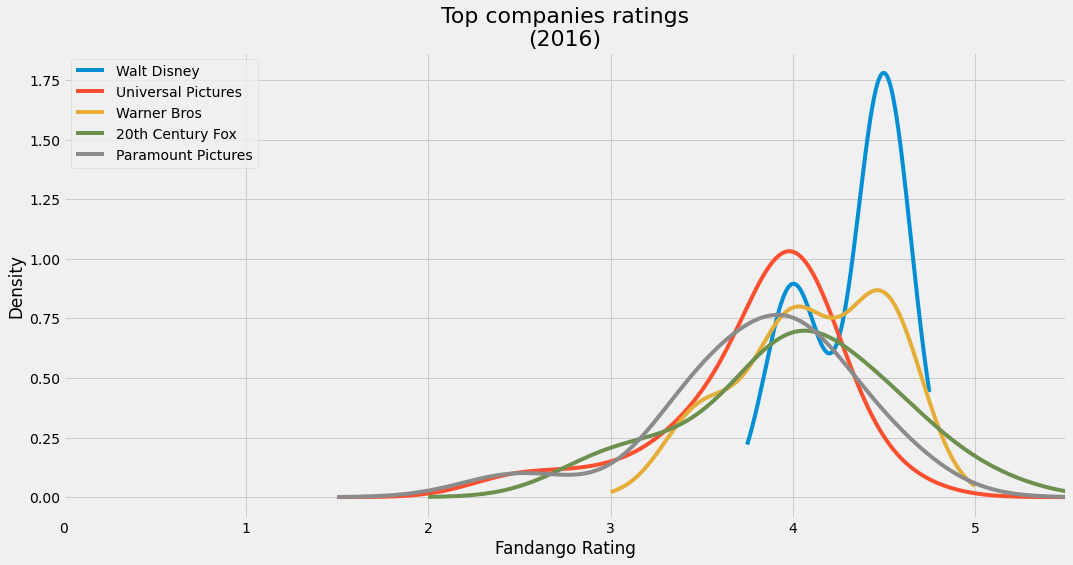

In [50]:
plt.figure(figsize=(16,8))
walt_disney_2016.fandango.plot.kde(label='Walt Disney', legend=True)
un_pict_2016.fandango.plot.kde(label='Universal Pictures', legend=True)
warner_2016.fandango.plot.kde(label='Warner Bros', legend=True)
fox_2016.fandango.plot.kde(label='20th Century Fox', legend=True)
paramount_2016.fandango.plot.kde(label='Paramount Pictures', legend=True)
plt.xlim((0,5.5))
plt.xlabel('Fandango Rating')
plt.title('Top companies ratings\n(2016)', size=22)
plt.show()

The situation appears to be almost the same for 2016.

In [51]:
# masking for other companies

other_companies_2016 = fan_2016.loc[(fan_2016.distribution != 'Walt Disney')\
                              &(fan_2016.distribution != 'Universal Pictures')\
                              &(fan_2016.distribution != 'Warner Bros')\
                              &(fan_2016.distribution != '20th Century')\
                              &(fan_2016.distribution != 'Paramount Pictures')]

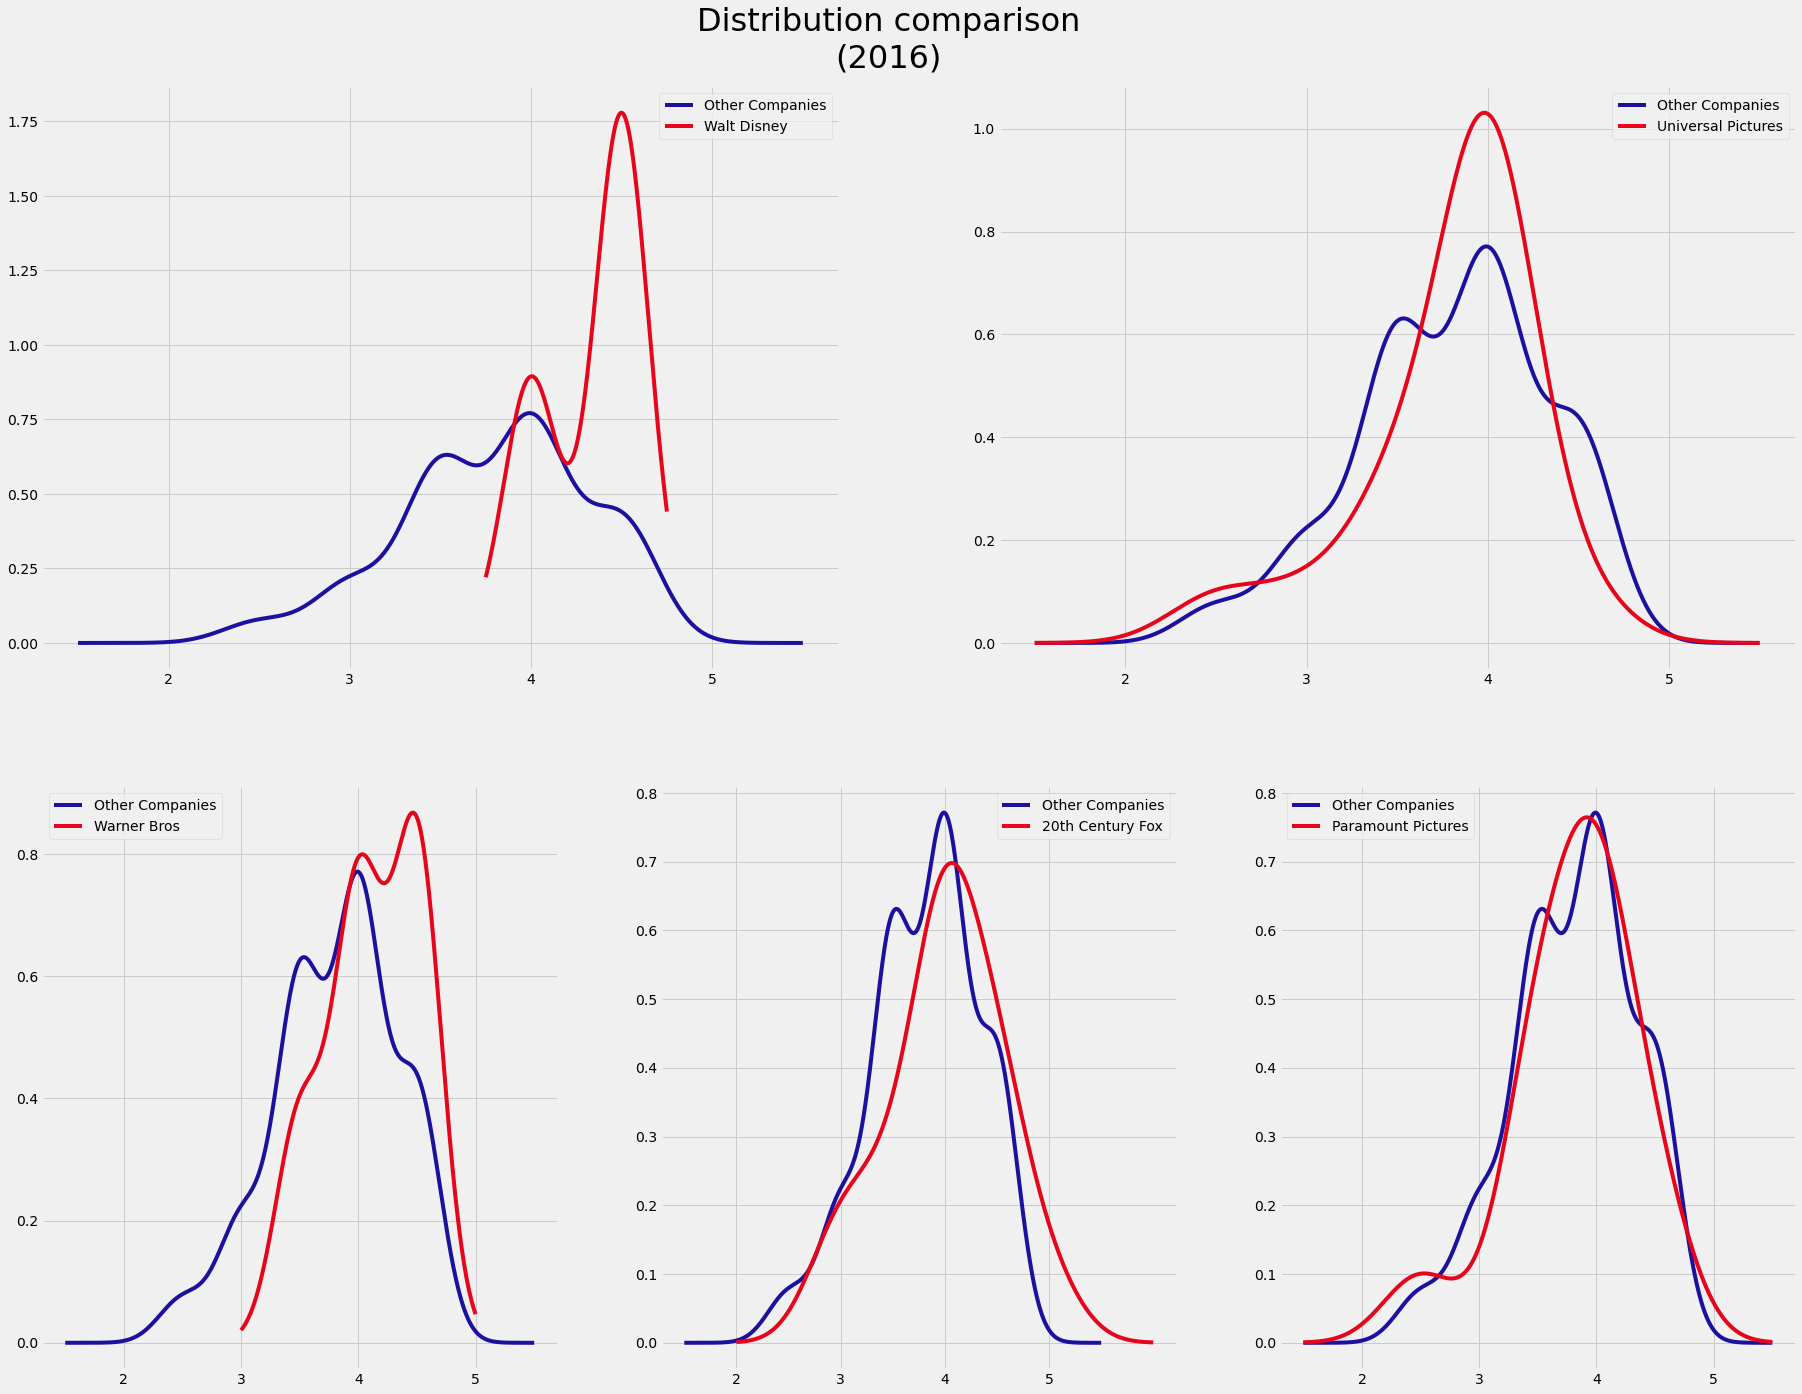

In [52]:
fig = plt.figure(figsize=(28,22))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,3,4)
ax4 = plt.subplot(2,3,5)
ax5 = plt.subplot(2,3,6)

axes = [ax1, ax2, ax3, ax4, ax5]

for ax in axes:
    ax.set_xticks([0,1,2,3,4,5])
    ax.set_ylabel('foo').set_visible(False)

# Walt Disney
other_companies_2016.fandango.plot.kde(ax=ax1, label='Other Companies', legend=True, color='#1c109e')
walt_disney_2016.fandango.plot.kde(ax=ax1, label='Walt Disney', legend=True, color='#e6051b')
# Universal Pictures
other_companies_2016.fandango.plot.kde(ax=ax2, label='Other Companies', legend=True, color='#1c109e')
un_pict_2016.fandango.plot.kde(ax=ax2, label='Universal Pictures', legend=True, color='#e6051b')
# Warner Bros
other_companies_2016.fandango.plot.kde(ax=ax3, label='Other Companies', legend=True, color='#1c109e')
warner_2016.fandango.plot.kde(ax=ax3, label='Warner Bros', legend=True, color='#e6051b')
# Fox
other_companies_2016.fandango.plot.kde(ax=ax4, label='Other Companies', legend=True, color='#1c109e')
fox_2016.fandango.plot.kde(ax=ax4, label='20th Century Fox', legend=True, color='#e6051b')
# Paramount
other_companies_2016.fandango.plot.kde(ax=ax5, label='Other Companies', legend=True, color='#1c109e')
paramount_2016.fandango.plot.kde(ax=ax5, label='Paramount Pictures', legend=True, color='#e6051b')

fig.suptitle('Distribution comparison\n(2016)', y=0.93, size=32)

plt.show()

For 2016 the range the differences among **Walt Disney** and other companies seems to have become even wider for what concern rating distribution.
It doesn't look like **Fandango** really improved its way of assigning values; they rather lowered the ratings from other companies. 

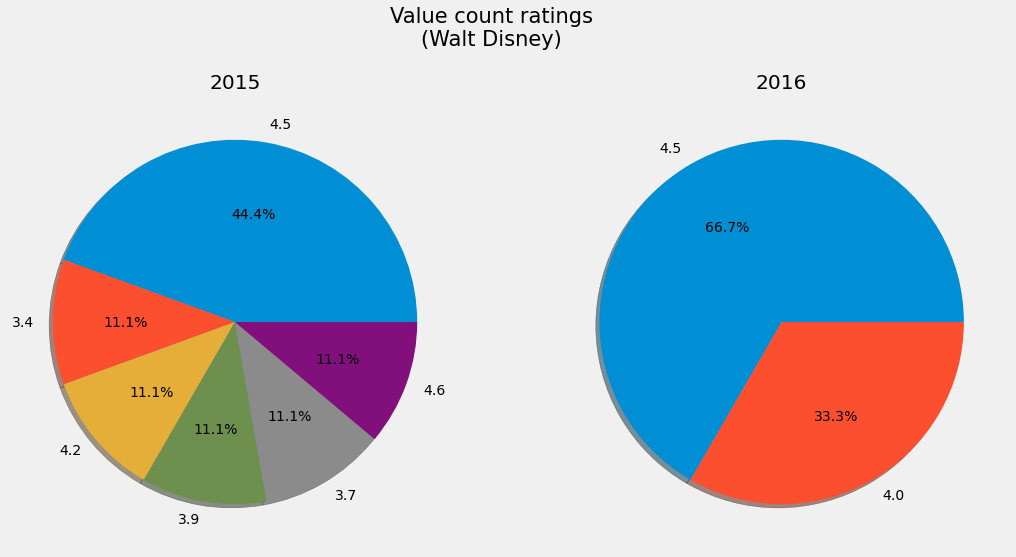

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 12))
walt_disney.Fandango_Ratingvalue.value_counts().plot.pie(ax=ax1, autopct='%1.1f%%', shadow=True)
ax1.set_ylabel('foo').set_visible(False)
ax1.set_title('2015')
walt_disney_2016.fandango.value_counts().plot.pie(ax=ax2, autopct='%1.1f%%', shadow=True)
ax2.set_ylabel('foo').set_visible(False)
ax2.set_title('2016')

fig.suptitle('Value count ratings\n(Walt Disney)',  y=0.84, size=21)

plt.show()

As we can see, in fact, in 2015 Walt Disney ratings were more or less equally distributed among a range from **3.4** to **4.6** with a peak represented by **4.5**; in 2016, instead, Fandango just rated movies from that company either **4.5** or **4.0**.

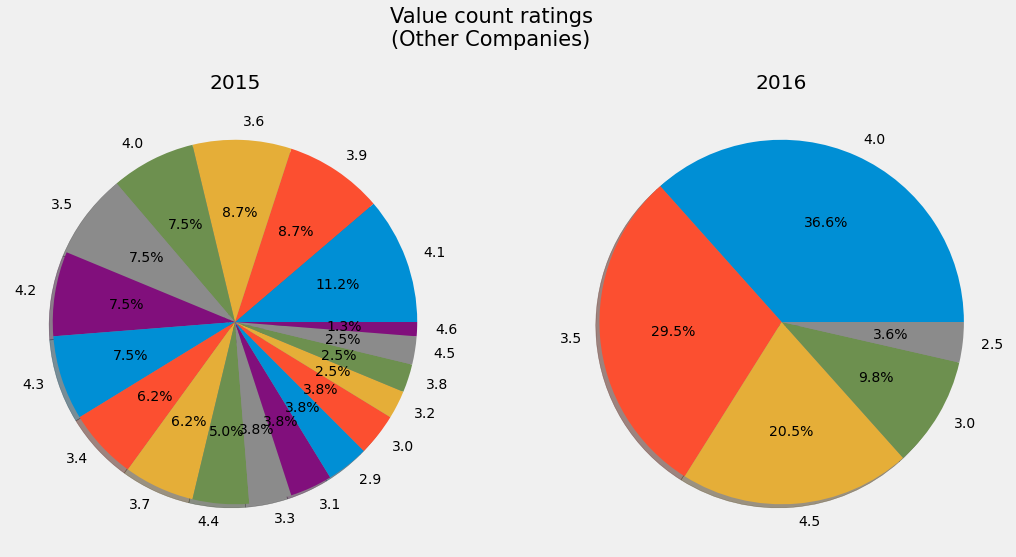

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 12))
other_companies.Fandango_Ratingvalue.value_counts().plot.pie(ax=ax1, autopct='%1.1f%%', shadow=True)
ax1.set_ylabel('foo').set_visible(False)
ax1.set_title('2015')
other_companies_2016.fandango.value_counts().plot.pie(ax=ax2, autopct='%1.1f%%', shadow=True)
ax2.set_ylabel('foo').set_visible(False)
ax2.set_title('2016')

fig.suptitle('Value count ratings\n(Other Companies)',  y=0.84, size=21)

plt.show()

We can see also that for movies in 2015 there wasn't a rating below **2.9** while in 2016 **3.6%**  of the movies are rated **2.5**

## Money and ratings: is there a correlation?

After all our analysis, we can assume that there is a strong correlation among the economic power of a company and the way Fandango rates its movies.

Finally, we'll plot some scatter graphs and see how each value behave.

If we read [this article](https://www.investopedia.com/financial-edge/0611/why-movies-cost-so-much-to-make.aspx), we can find information on how to filter our dataframe to check for blockbuster movies.
It is said that an average cost for a big production is 100 millions of dollars or more.
We'll start from that.

In [107]:
bb_15 = fan_2015.loc[fan_2015.movie_budget >= 100]
bb_16 = fan_2016.loc[fan_2016.movie_budget >= 100]

0.16455173063531842

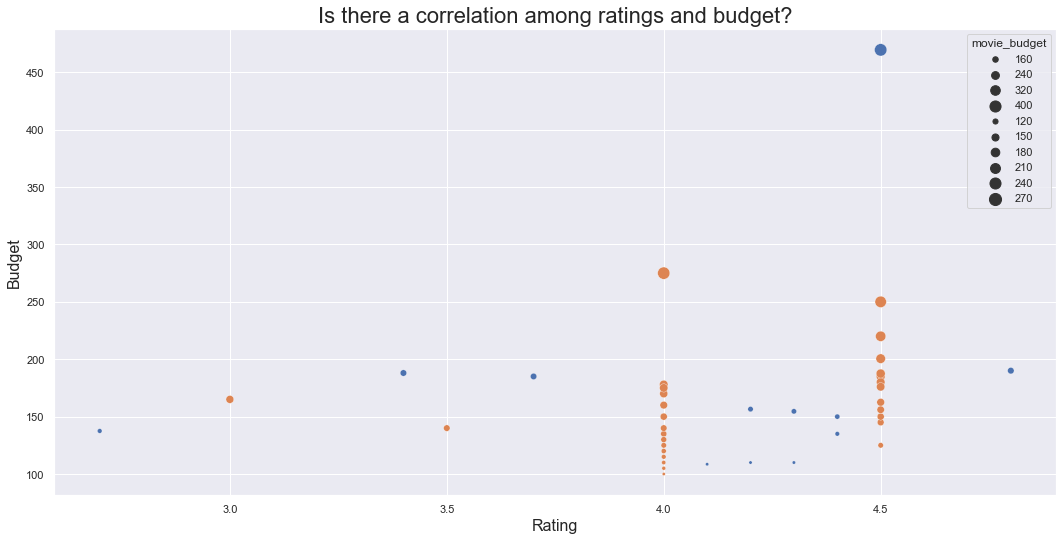

In [113]:
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(data=bb_15, x='Fandango_Ratingvalue', 
                y='movie_budget', size='movie_budget',
                sizes=(10, 150), ax=ax
               )
sns.scatterplot(data=bb_16, x='fandango',
                y='movie_budget', size='movie_budget',
                sizes=(10, 150), ax=ax,
               )
plt.xlabel('Rating', size=16)
plt.ylabel('Budget', size=16)
plt.title('Is there a correlation among ratings and budget?', size=22)
plt.show()

Almost every movie that we categorized as a blockbuster (with a movie budget major or equal of 100 millions) is grouped around the highest values of the rating scale decide by Fandango.

We'll now plot for the medium budget movies (considering budgets between 2 and 100).

In [110]:
avg_movies_15 = fan_2015.loc[(fan_2015.movie_budget > 2) & (fan_2015.movie_budget < 100)]
avg_movies_16 = fan_2016.loc[(fan_2016.movie_budget > 2) & (fan_2016.movie_budget < 100)]

0.21461123491258502

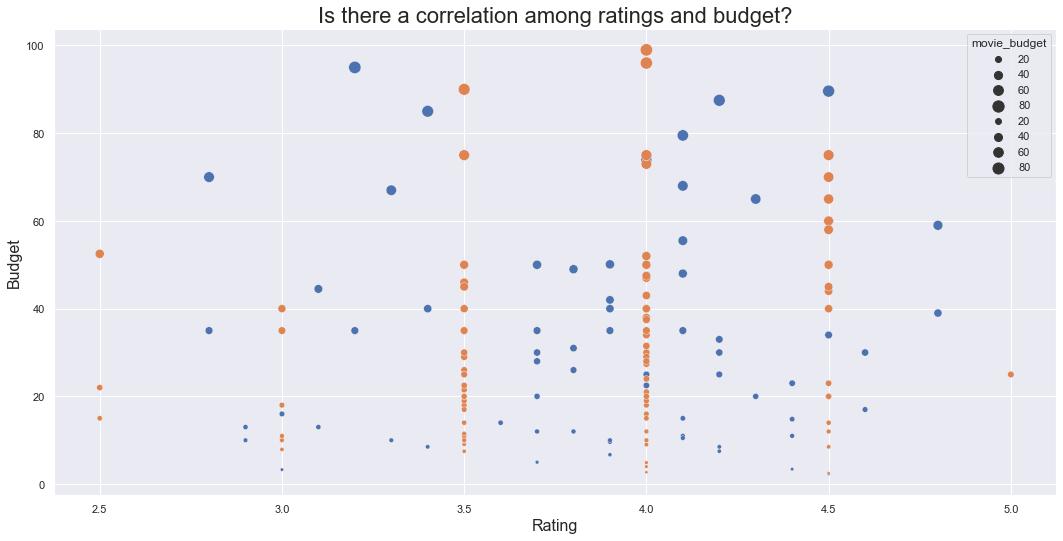

In [111]:
fig, ax = plt.subplots(figsize=(16,8))
sns.scatterplot(data=avg_movies_15, x='Fandango_Ratingvalue', 
                y='movie_budget', size='movie_budget',
                sizes=(10, 150), ax=ax
               )
sns.scatterplot(data=avg_movies_16, x='fandango',
                y='movie_budget', size='movie_budget',
                sizes=(10, 150), ax=ax,
               )
plt.xlabel('Rating', size=16)
plt.ylabel('Budget', size=16)
plt.title('Is there a correlation among ratings and budget?', size=22)
plt.show()

For the movies with a medium budget, the values are much more dispersed within the graph.

# Conclusion

By looking to the analysis we did, we can draw some conclusion over the job made by **Fandango** in rating movies between years 2015 and 2016.

* The top companies have been scored almost the same rating across the years and not much seems to change.
* For the year 2016 **Walt Disney** obtained values that are even more "outlier" compared to those of 2015
* The change in the distribution that we saw in the first part of the analysis must be attributed to greater severity towards smaller companies rather than to a significant change of approach in valuation
* To us it seems that Fandango takes into great consideration the economic status of a company, before issuing an evaluation.